# Conceptual

## 1

Did this one on paper. In a nutshell, user the formula for the variance of the sum of two correlated variables. Take the first derivative with respect to $\alpha$ and set it equal to 0. Then take the second derivative and confirm that it's positive in order to prove that the first derivative is a minimum and not a maximum

## 2

We will now derive the probability of a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $n$ observations.

a) What is the probability that the first bootstrap observation is *not* the $j_{th}$ observation from the original sample?

The probability of any observation being the first observation is $\frac{1}{n}$. Since there are $n - 1$ observations that are not $j$, the probability is $\frac{n - 1}{n}$

b) What is the probability that the second bootstrap observation is *not* the $j_{th}$ observation from the original sample?

Since bootstrapping draws with replacement every draw has the same probability for all observations, so it's still $\frac{n - 1}{n}$ = $(1 - \frac{1}{n})$

c) Argue that the probability that the $j_{th}$ observation is *not* in the bootstrap sample is $(1 - \frac{1}{n})^n$

As described above the probability for any draw not containing the $j_{th}$ observation is $(1 - \frac{1}{n})^n$. Since they are all independent draws, the joint probability of any number of draws is just that number multiplied by itself a number of times equal to the number of draws. So if you draw $n$ observations with replacement you get $(1 - \frac{1}{n})^n$

d) When $n = 5$, what is the probability that the $j_{th}$ observation is in the bootstrap sample?

First, it's equal to 1 minus the probability that it is not in sample, so $1 - (1 - \frac{1}{n})^n$

In [1]:
def boot_proba(n):
    """Calculate the probability that observation j is not in a bootstrap sample from a dataset of size n"""
    return 1 - ((1 - (1 / n)) ** n)

In [2]:
boot_proba(5)

0.6723199999999999

e) When $n = 100$, what is the probability that the $j_{th}$ observation is in the bootstrap sample?

In [3]:
boot_proba(100)

0.6339676587267709

f) When $n = 10000$, what is the probability that the $j_{th}$ observation is in the bootstrap sample?

In [4]:
boot_proba(10_000)

0.6321389535670295

g) Create a plot that displays, for each integer value of $n$ from 1 to 100,000, the probability that the $j_{th}$ observation is in the bootstrap sample. Comment on what you observe

In [5]:
import numpy as np
nums = np.arange(1, 100_001, 1)
nums_prob = np.vectorize(boot_proba)(nums)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

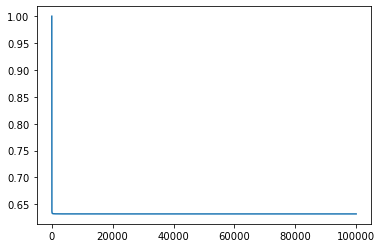

In [7]:
plt.plot(nums, nums_prob);

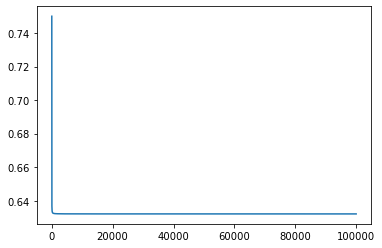

In [8]:
plt.plot(nums[1:], nums_prob[1:]);

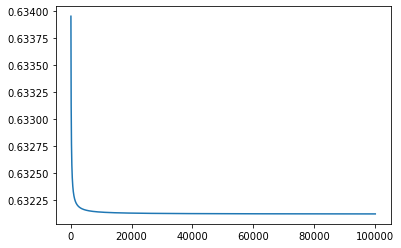

In [9]:
plt.plot(nums[100:], nums_prob[100:]);

I observe that it converges rapidly to about 0.63 as soon as $n$ gets a little larger than 1

h) We will now investigate numerically the probability that a bootstrap sample of size $ n = 100$ contains the $j_{th}$ observation. Here $j = 4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [10]:
base_sample = np.arange(1, 101)
np.mean([4 in np.random.choice(base_sample, size=len(base_sample)) for _ in range(100_000)])

0.63377

Looks pretty close to the analytic solution.

## 3
We now review $k$-fold cross-validation.

a) Explain how $k$-fold cross validation is implemented. 

The dataset is divided into $k$ approximately equally sized samples (folds) without replacement. The model is trained on $k - 1$ of those folds, and then a summary statistic of interest, such as mean squared error is calculated on the remaining fold. This process is repeated $k$ times such that each of the $k$ folds has the summary statistic calculated on it. You can then examine the statistical properties of those $k$ estimates to make inferences about your predictor. Such as the mean of those estimates for a population estimate, or their standard deviation to get an idea of the precision of your estimate.

b) What are the advantages and disadvantages of $k-fold$ cross validation relative to:
* The validation set approach
* LOOCV

Because you need to make $k$ estimates, $k$ fold cross validation is more computationally expensive than the validation set approach, but less than LOOCV, except in the case where $k = n$ in which case they are identical.
With a validation set you don't get any distributional attributes of your statistic of interest, as you only produce one estimate. 
LOOCV has lower bias than $k$ fold, but also higher variance. Overall $k$ fold is preferred to LOOCV considering both tradeoffs. The validation set has the mirror image issue. It's lower variance than $k$ fold, but higher bias, and overall $k$ fold is preferred to it too, putting aside the computational advantage.

## 4

Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

Use bootstrapping. Sample with replacement $n$ pairs of observations $(x_i, y_i)$ from your data. Train your model on that sample. Estimate the response Y for your predictor X based on that sample data.
Repeat this a number of times, recording the estimate each time. Compute the standard deviation of your estimates.